In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('application_data_new.csv')

In [17]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


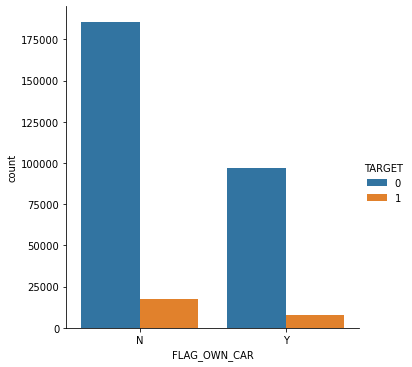

In [34]:
sns.catplot(data=df, x = 'FLAG_OWN_CAR',  hue='TARGET', kind="count" )

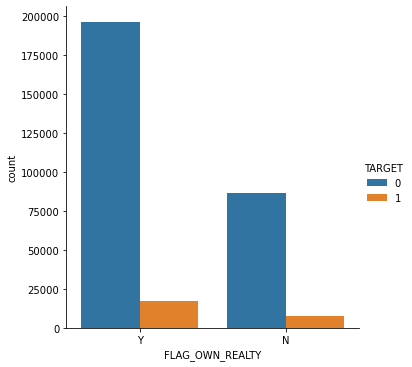

In [35]:
sns.catplot(data=df, x = 'FLAG_OWN_REALTY',  hue='TARGET', kind="count" )

In [20]:
import plotly.express as px

In [27]:
fig = px.bar(df, x="FLAG_OWN_REALTY", y="AMT_CREDIT", color="TARGET", barmode="group")

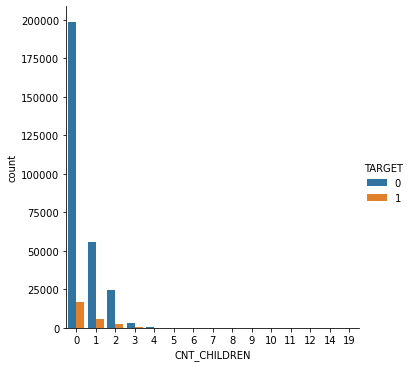

In [30]:
sns.catplot(data = df, x = "CNT_CHILDREN", hue="TARGET", kind = "count")

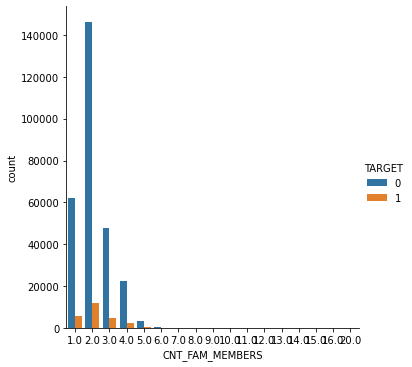

In [32]:
sns.catplot(data = df, x = 'CNT_FAM_MEMBERS', hue = "TARGET", kind = "count")

<Figure size 1800x1440 with 0 Axes>

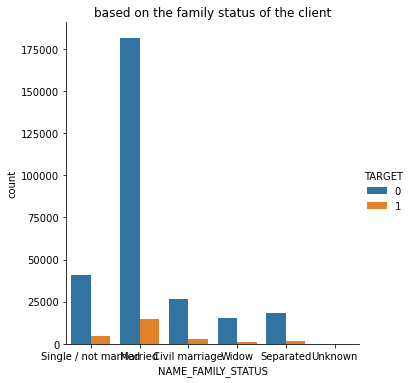

In [64]:
plt.figure(figsize = (25, 20))
sns.catplot(data = df, x = "NAME_FAMILY_STATUS", hue="TARGET", kind = "count")
plt.title('based on the family status of the client')
plt.show()

In [8]:
other_category = df[df["TARGET"] == 0]
incapable_applicants  = df[df["TARGET"] == 1]

In [12]:
print("no. of applicants in other cases(category-2) :", other_category.shape[0])
print("No. of applicants facing payment difficulties and had late payment more than X days on at least one of the first Y installments of the loan(category-1) : ", incapable_applicants.shape[0])

no. of applicants in other cases(category-2) : 282686
No. of applicants facing payment difficulties and had late payment more than X days on at least one of the first Y installments of the loan(category-1) :  24825


In [14]:
print("Percentage of applicants in category-1: ", incapable_applicants.shape[0]*100/(incapable_applicants.shape[0]+other_category.shape[0]))

Percentage of applicants in category-1:  8.072881945686495


In [16]:
Percentage_other_categories = 100 - 8.072881945686495
print(Percentage_other_categories)

91.92711805431351


Data_Imbalance_ ratio = 8:92

C:\Users\ksk76\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


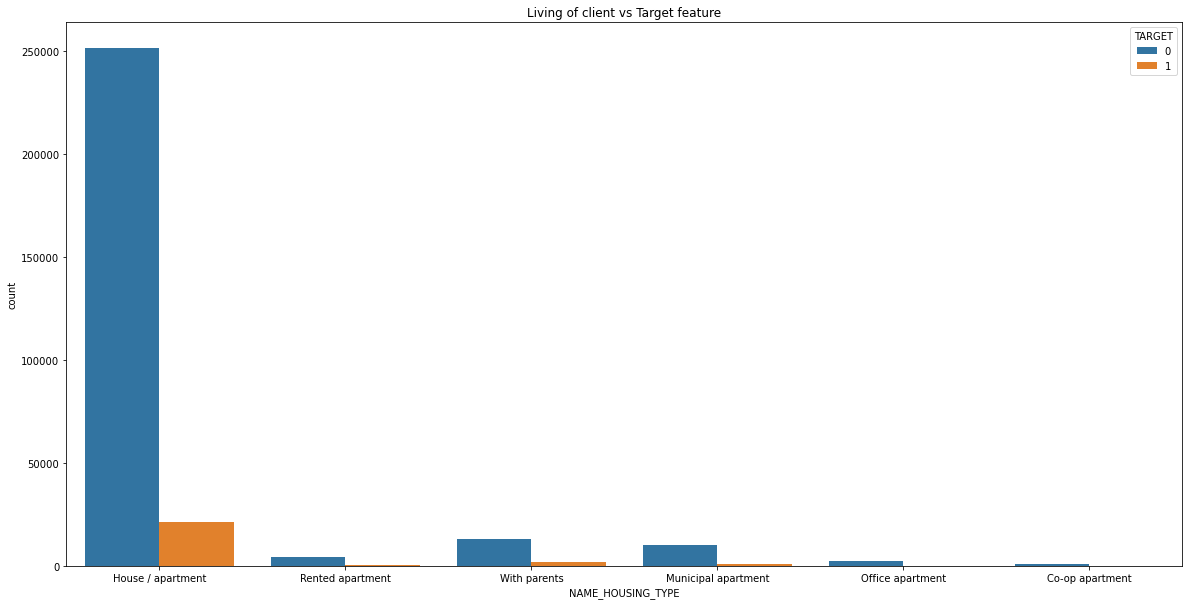

In [20]:
plt.figure(figsize = (20, 10))
sns.countplot(df["NAME_HOUSING_TYPE"], hue=df["TARGET"])
plt.title("Living of client vs Target feature")
plt.show()

To differentiate the target based on the features available in the dataset, the target feature to be segmented into the individual categories, so that category_1 and category_2 percent can be calculated

In [31]:
def category_wise_percentage(df, col):
    new_df = pd.DataFrame(columns=['Value', 'Percentage of category_1(clients who pay late, facing payment difficulties)']) 
    for value in df[col].unique():
        category_1_count = df[(df[col] == value) & (df.TARGET == 1)].shape[0]
        total_count = df[df[col] == value].shape[0]
        new_df = new_df.append({'Value' : value , 'Percentage of category_1(clients who pay late, facing payment difficulties)' : (category_1_count*100/total_count)}, ignore_index=True)
    return new_df.sort_values(by='Percentage of category_1(clients who pay late, facing payment difficulties)', ascending=False)

In [32]:
category_wise_percentage(df, 'NAME_HOUSING_TYPE')

,Value,"Percentage of category_1(clients who pay late, facing payment difficulties)"
1,Rented apartment,12.313051
2,With parents,11.698113
3,Municipal apartment,8.539748
5,Co-op apartment,7.932264
0,House / apartment,7.795711
4,Office apartment,6.572411


Most of the applicants live in House/Apartment
Applicants living with their parents or in rented apartment have higher chance of being in category-1

In [34]:
category_wise_percentage(df, 'FLAG_OWN_CAR')

,Value,"Percentage of category_1(clients who pay late, facing payment difficulties)"
0,N,8.500227
1,Y,7.243730


In [35]:
category_wise_percentage(df, 'FLAG_OWN_REALTY')

,Value,"Percentage of category_1(clients who pay late, facing payment difficulties)"
1,N,8.324929
0,Y,7.961577


Most of the applicants own realty
Most of the applicants do not own cars
People not owning reality and car and have a slightly higher chance of being in category-1 than the people who own reality and car

In [40]:
print('Family_status vs Target(category-1)')
category_wise_percentage(df, 'NAME_FAMILY_STATUS')

Family_status vs Target(category-1)


,Value,"Percentage of category_1(clients who pay late, facing payment difficulties)"
2,Civil marriage,9.944584
0,Single / not married,9.807675
4,Separated,8.194234
1,Married,7.559868
3,Widow,5.824217
5,Unknown,0.000000


In [41]:
print('Children_count vs Target(category-1)')
category_wise_percentage(df, 'CNT_CHILDREN')

Children_count vs Target(category-1)


,Value,"Percentage of category_1(clients who pay late, facing payment difficulties)"
9,9.0,100.000000
10,11.0,100.000000
7,6.0,28.571429
4,4.0,12.820513
3,3.0,9.631423
1,1.0,8.923575
2,2.0,8.721821
6,5.0,8.333333
0,0.0,7.711809
5,7.0,0.000000


C:\Users\ksk76\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


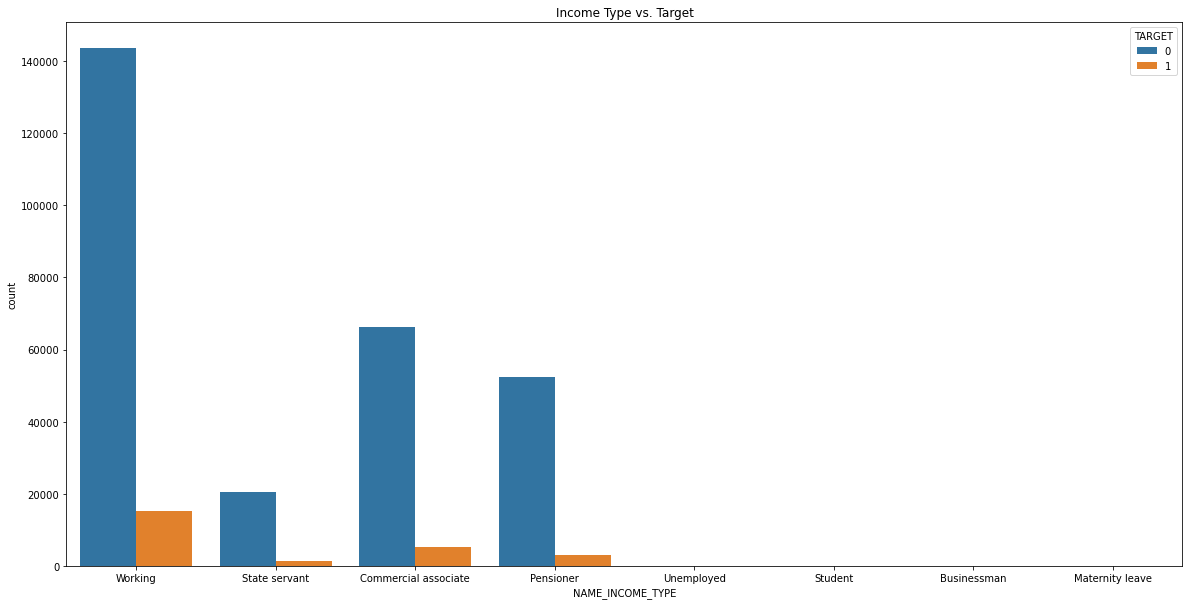

In [44]:
plt.figure(figsize = (20,10))
sns.countplot(df['NAME_INCOME_TYPE'], hue=df["TARGET"])
plt.title("Income Type vs. Target")
plt.show()

In [47]:
print('Target percent based on income type')
category_wise_percentage(df,'NAME_INCOME_TYPE')

Target percent based on income type


,Value,"Percentage of category_1(clients who pay late, facing payment difficulties)"
7,Maternity leave,40.000000
4,Unemployed,36.363636
0,Working,9.588472
2,Commercial associate,7.484257
1,State servant,5.754965
3,Pensioner,5.386366
5,Student,0.000000
6,Businessman,0.000000


Gender vs target status

C:\Users\ksk76\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


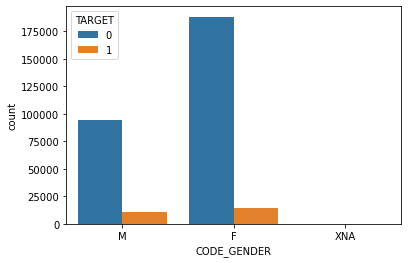

In [48]:
sns.countplot(df['CODE_GENDER'], hue=df["TARGET"])
plt.show()

In [49]:
other_category = df[df["TARGET"] == 0]
incapable_applicants  = df[df["TARGET"] == 1]

category-1 percentage is higher for male applicants

In [51]:
incapable_applicants_corr = incapable_applicants.corr()
round(incapable_applicants_corr, 2)

corr_list = incapable_applicants_corr.unstack()

The top 10 highly correlated for category-1 (clients with payment difficulties)

In [53]:
corr_list.sort_values(ascending=False).drop_duplicates().head(11)

SK_ID_CURR                SK_ID_CURR                  1.000000
OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE    0.998269
BASEMENTAREA_AVG          BASEMENTAREA_MEDI           0.998250
COMMONAREA_MEDI           COMMONAREA_AVG              0.998107
YEARS_BUILD_MEDI          YEARS_BUILD_AVG             0.998100
NONLIVINGAPARTMENTS_AVG   NONLIVINGAPARTMENTS_MEDI    0.998075
FLOORSMIN_MEDI            FLOORSMIN_AVG               0.997825
LIVINGAPARTMENTS_MEDI     LIVINGAPARTMENTS_AVG        0.997668
FLOORSMAX_MEDI            FLOORSMAX_AVG               0.997187
NONLIVINGAPARTMENTS_MODE  NONLIVINGAPARTMENTS_MEDI    0.997032
ENTRANCES_MEDI            ENTRANCES_AVG               0.996700
dtype: float64

In [54]:
other_corr = other_category.corr()
round(other_corr, 2)

other_corr_list =other_corr.unstack()

The top 10 highly correlated for category-2 (favourable clients)

In [55]:
other_corr_list.sort_values(ascending=False).drop_duplicates().head(11)

SK_ID_CURR                SK_ID_CURR                  1.000000
YEARS_BUILD_AVG           YEARS_BUILD_MEDI            0.998522
OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE    0.998508
FLOORSMIN_MEDI            FLOORSMIN_AVG               0.997202
FLOORSMAX_AVG             FLOORSMAX_MEDI              0.997018
ENTRANCES_AVG             ENTRANCES_MEDI              0.996899
ELEVATORS_AVG             ELEVATORS_MEDI              0.996161
COMMONAREA_AVG            COMMONAREA_MEDI             0.995857
LIVINGAREA_MEDI           LIVINGAREA_AVG              0.995568
APARTMENTS_AVG            APARTMENTS_MEDI             0.995163
BASEMENTAREA_MEDI         BASEMENTAREA_AVG            0.994081
dtype: float64